In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

import scipy.optimize as opt
from scipy.integrate import odeint, quad
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

from pathlib import Path
import os
import sys
from byutpl.properties import water as water

In [30]:
# ---------------------------------------------- Import Data ---------------------------------------------- #
data1 = pd.read_csv('data/Trial1.csv')
data2 = pd.read_csv('data/Trial2.csv')
data3 = pd.read_csv('data/Trial3.csv')
data4 = pd.read_csv('data/Trial4.csv')
data5 = pd.read_csv('data/Trial5.csv')
data6 = pd.read_csv('data/Trial6.csv')
data7 = pd.read_csv('data/Trial7.csv')
data8 = pd.read_csv('data/Trial8.csv')
data9 = pd.read_csv('data/Trial9.csv')
dataA = pd.read_csv('data/TrialA.csv')
dataB = pd.read_csv('data/TrialB.csv')
dataC = pd.read_csv('data/TrialC.csv')
dataD = pd.read_csv('data/TrialD.csv')
dataE = pd.read_csv('data/TrialE.csv')
dataF = pd.read_csv('data/TrialF.csv')


# data_collection =                 np.array([data4,data5,data6,data7,data8,data9,dataA,dataB,dataC,dataD,dataE,dataF])
data_collection = [data1,data2,data3,data4,data5,data6,data7,data8,data9,dataA,dataB,dataC,dataD,dataE,dataF]

print(data4.keys())

# print(data_collection[5].keys())

Index(['Time (sec)', 'Water Level (ft)', 'Water Flowrate (GPM)',
       'House Steam Pressure (psig)', 'Steam Pressure (psig)',
       'Inlet Water Temperature (C)', 'Outlet Water Temperature (C)',
       'Makeup Temperature (C)', 'Makeup Flowrate (L/min)',
       'Ambient Temperature (C)', 'Ambient Pressure (kPa)',
       'Flow Setpoint (GPM)', 'Flow Control Output (%)', 'Level Setpoint (ft)',
       'Level Control Output (%)', 'Steam Setpoint (psig)',
       'Steam Control Output (%)', 'Tube-Side Pressure Drop (psig)'],
      dtype='object')


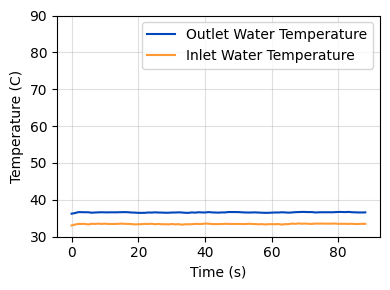

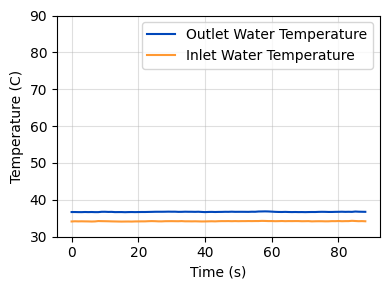

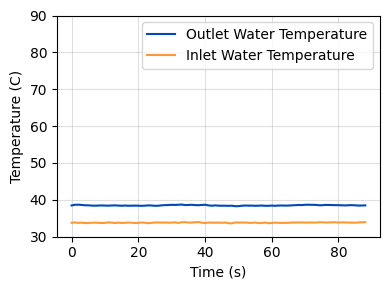

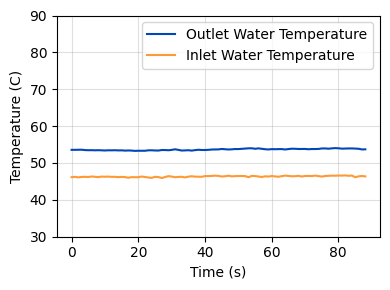

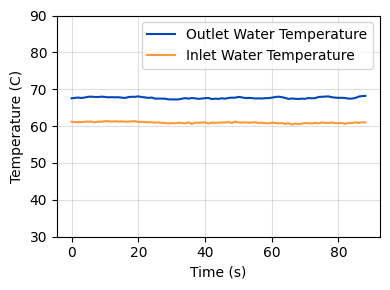

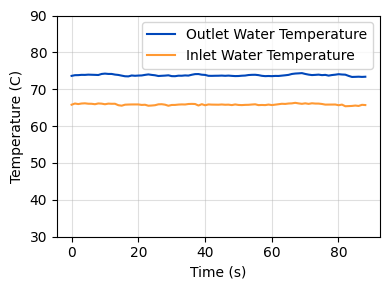

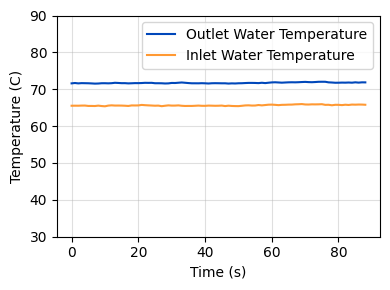

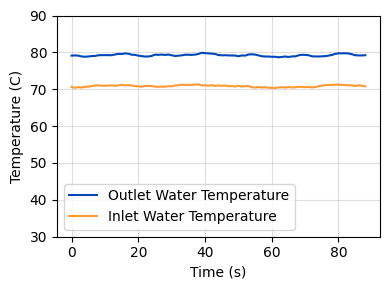

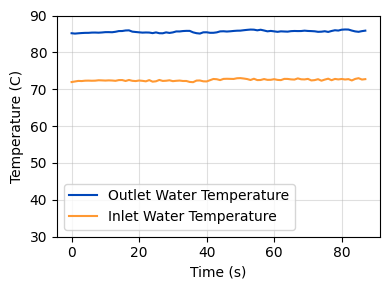

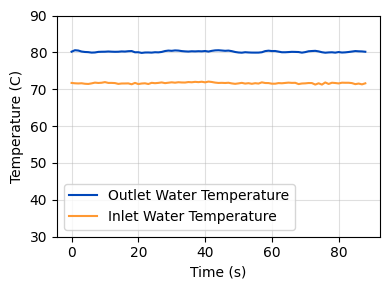

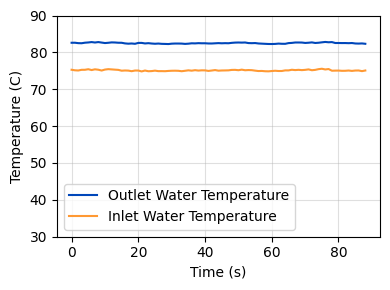

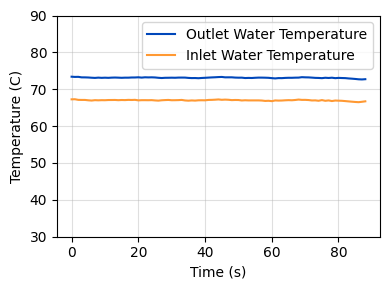

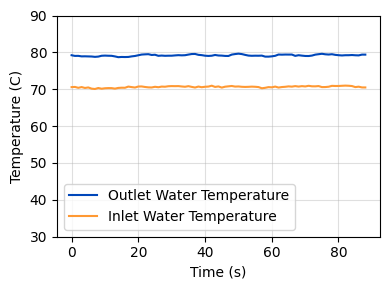

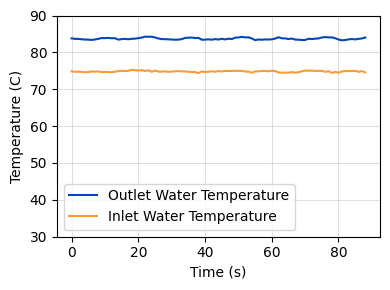

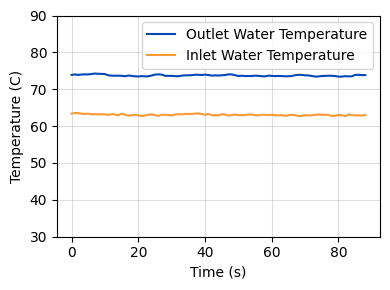

In [54]:
# loop through each data point, and plot it
for i, dataset in enumerate(data_collection):
    fig, ax1 = plt.subplots(1,1,figsize = (4,3))

    ax1.plot(dataset['Time (sec)'] - dataset['Time (sec)'][0], dataset['Outlet Water Temperature (C)'], color = '#0047ba',label = 'Outlet Water Temperature')
    ax1.plot(dataset['Time (sec)'] - dataset['Time (sec)'][0], dataset['Inlet Water Temperature (C)'], color = '#ff9933',label = 'Inlet Water Temperature')

    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Temperature (C)')
    ax1.legend()
    ax1.grid(alpha = .4)

    # ax1.set_title(f'Trial {i + 1}: {np.average(dataset['Steam Pressure (psig)']):.1f} psig, {np.average(dataset['Water Flowrate (GPM)']):.1f} gpm')
    ax1.set_ylim(30,90)

    filename = 'raw_data_SS' + str(i+1) + '.png'
    plt.tight_layout()

    plt.savefig('figures/' + filename, dpi = 300)

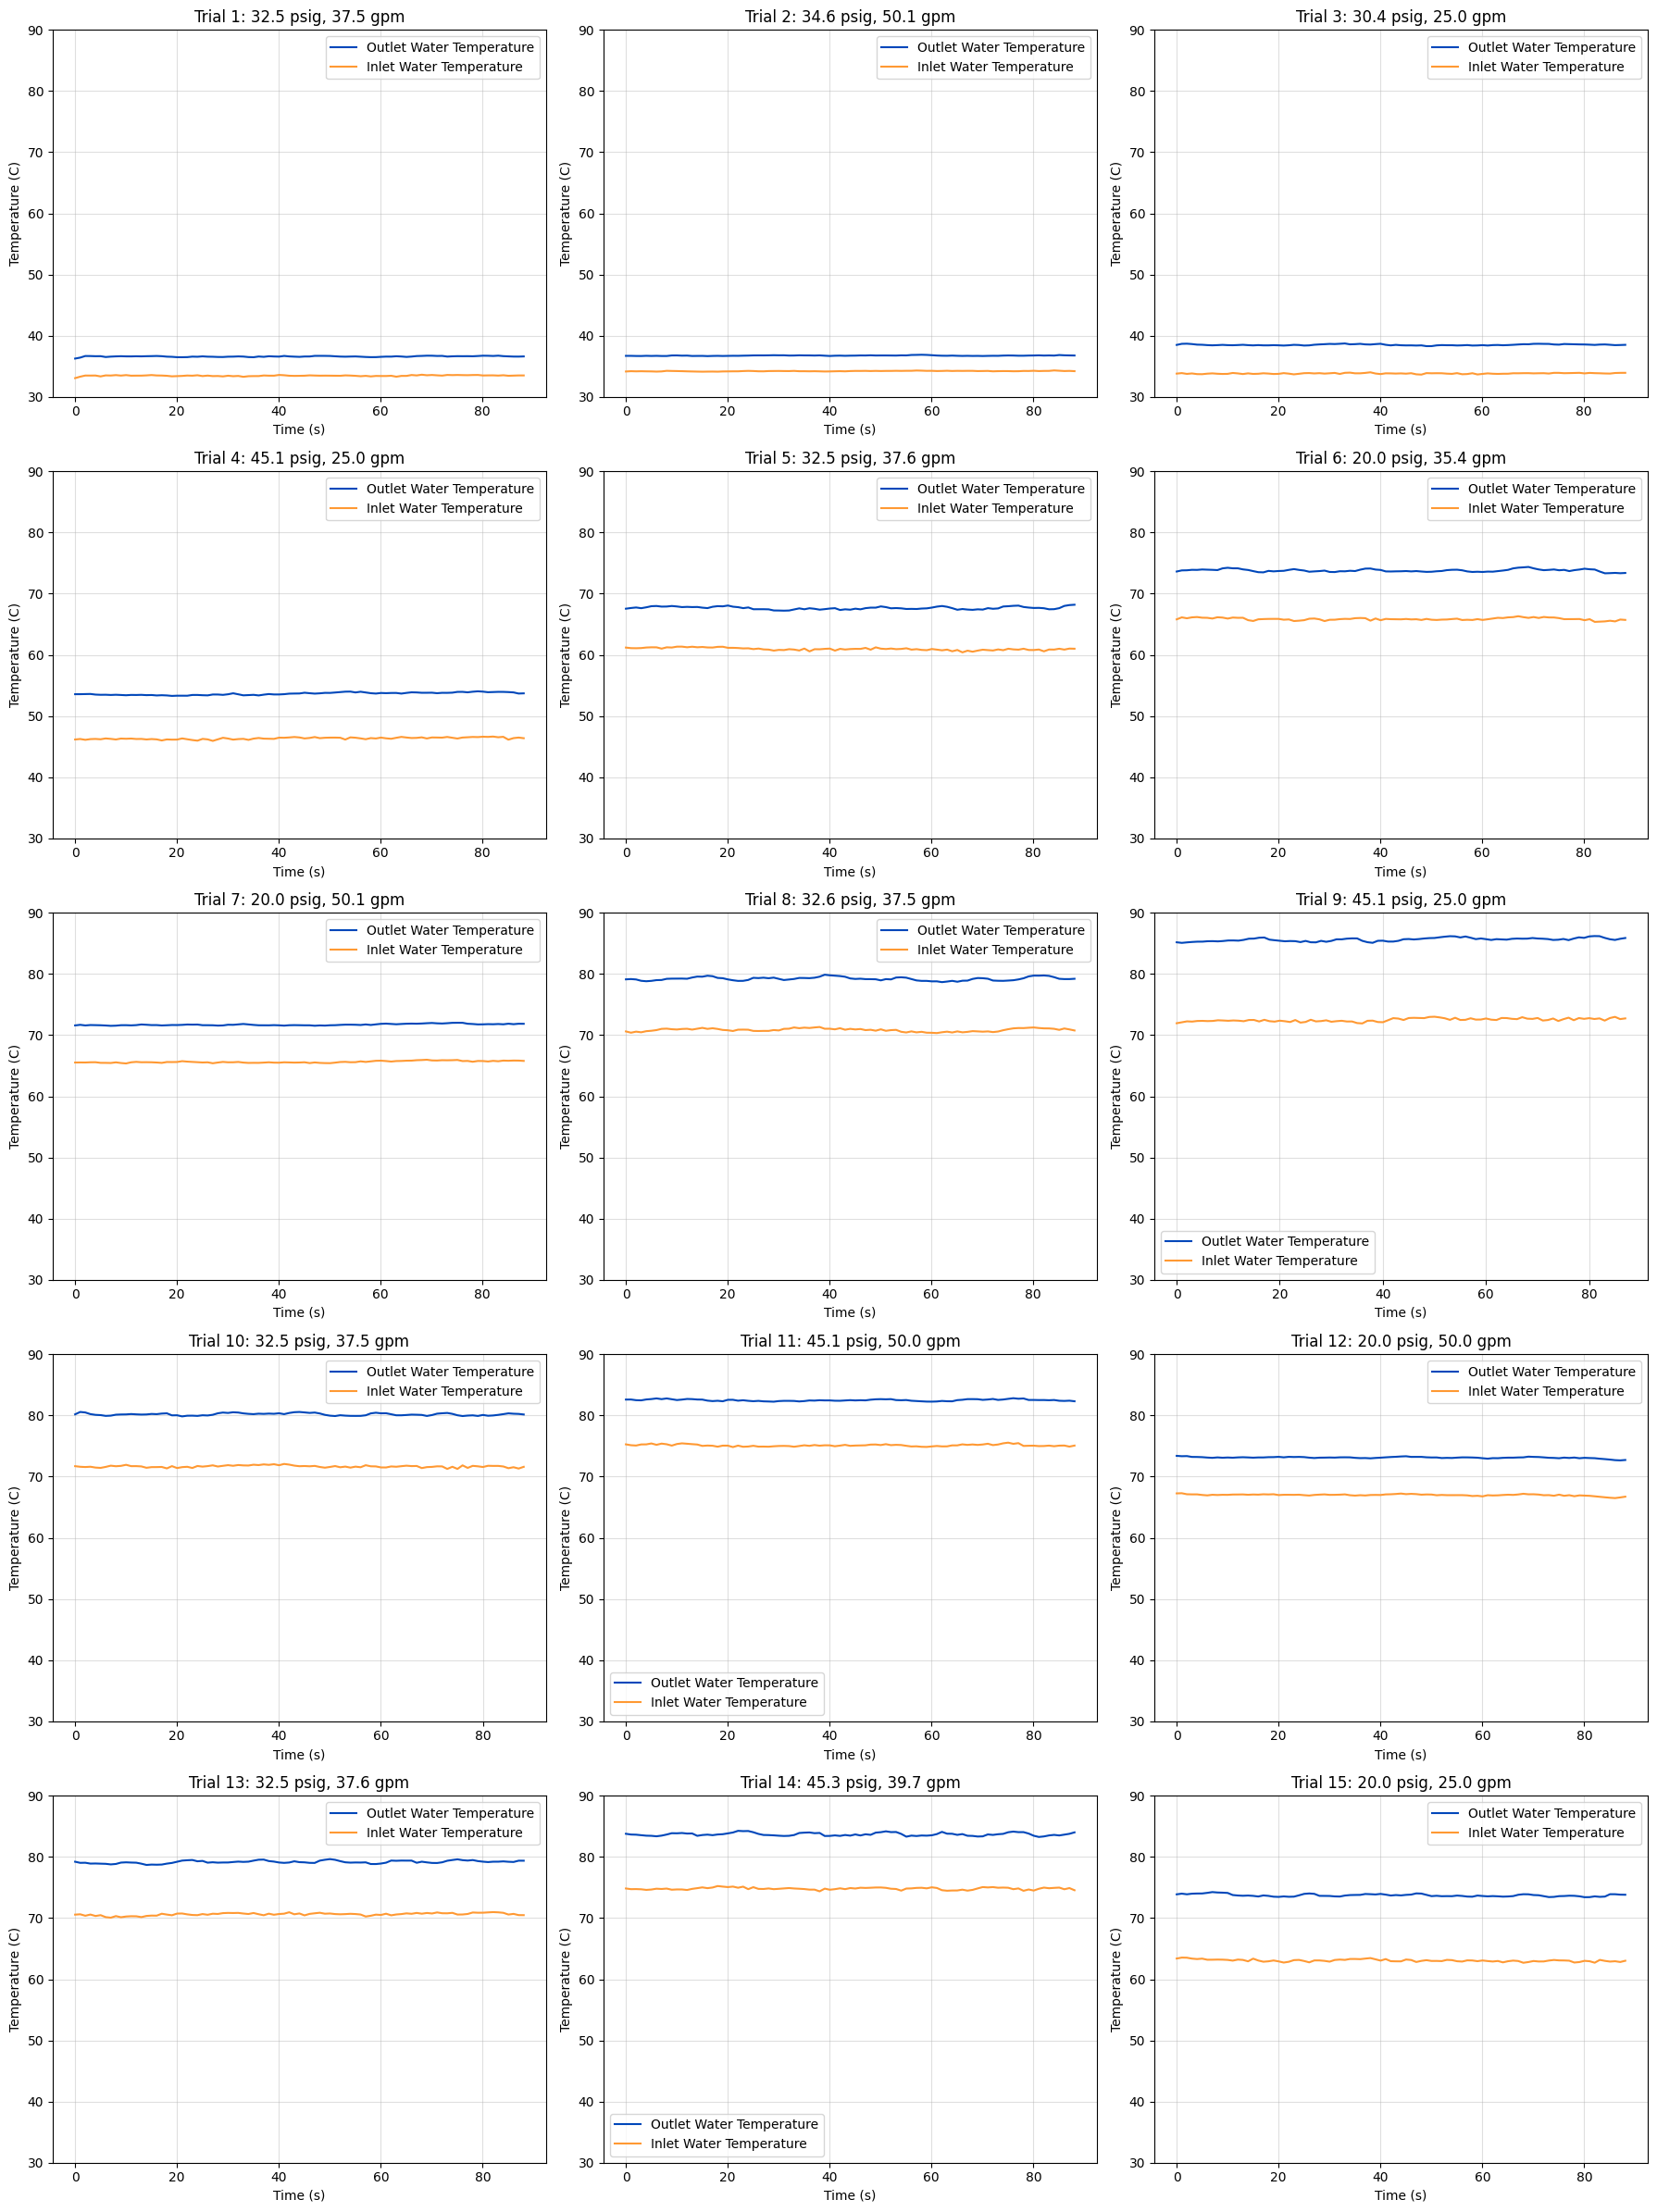

In [50]:
# loop through each data point, and plot it
fig, axs = plt.subplots(5,3,figsize = (18,24))

for i in range(3):
    for j in range(5):
        dataset = data_collection[(j*3) + i]
        ax = axs[j,i]

        ax.plot(dataset['Time (sec)'] - dataset['Time (sec)'][0], dataset['Outlet Water Temperature (C)'], color = '#0047ba',label = 'Outlet Water Temperature')
        ax.plot(dataset['Time (sec)'] - dataset['Time (sec)'][0], dataset['Inlet Water Temperature (C)'], color = '#ff9933',label = 'Inlet Water Temperature')

        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Temperature (C)')
        ax.legend()
        ax.grid(alpha = .4)

        ax.set_title(f'Trial {(j * 3) + i + 1}: {np.average(dataset['Steam Pressure (psig)']):.1f} psig, {np.average(dataset['Water Flowrate (GPM)']):.1f} gpm')
        ax.set_ylim(30,90)


plt.tight_layout()
plt.savefig('raw_data_SS.png')